In [36]:
from PIL import Image
import pydicom
import os
import matplotlib.pyplot as plt
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut



In [182]:
ds = pydicom.dcmread("../Segment_data/Tumor_pancreas/Mask/pancreas_021.dcm")

In [173]:
# ds.dtype

In [174]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.45981115298234613656776731044887589
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.2.1125.1.45981115298234613656776731044887589
(0008, 0020) Study Date       

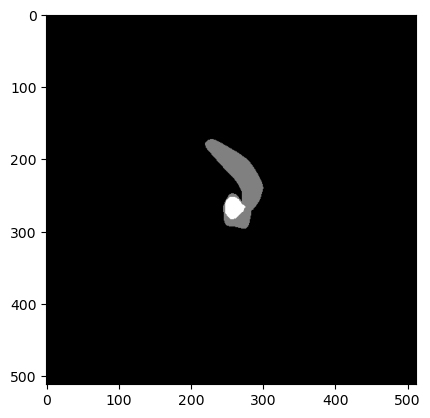

In [183]:
plt.imshow(ds.pixel_array,cmap="gray")

In [184]:

windowed = apply_voi_lut(ds.pixel_array, ds)

new_image = ds.pixel_array.astype(np.int16)

# new_image[new_image > 1023] = 1023

# scaled_image = ((new_image + 1024) / 2047) * 65535
scaled_image = new_image
scaled_image = np.int32(scaled_image)

final_image = Image.fromarray(scaled_image)


In [187]:
scaled_image
ele = np.min(scaled_image)
ele

0

In [178]:
# final_image.show()

In [179]:
# import cv2

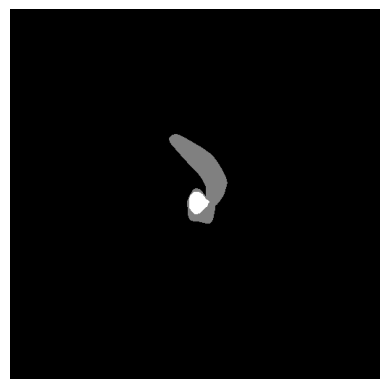

In [186]:
plt.imshow(scaled_image,cmap="gray")
path="../dataset_new/train/images/"+"newone4.png"
plt.axis('off')

plt.savefig(path,format='png', pad_inches=0,bbox_inches='tight',dpi=138.75)

In [57]:
file = Image.open("../dataset_new/train/images/pancreas_001.png")
file_array = np.array(file)
file_array.dtype

dtype('int32')

In [55]:
ele = np.max(file_array)
ele

65535

In [103]:
if(scaled_image.all()==file_array.all()):
    print("true")
else:
    print("false")

true


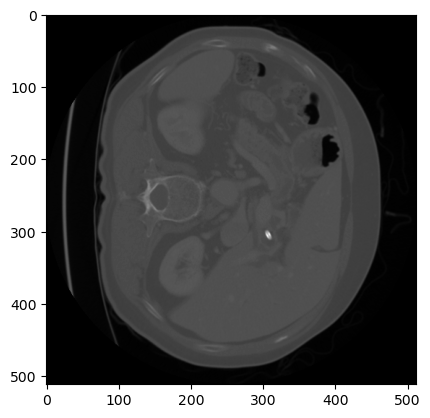

In [56]:
plt.imshow(file_array,cmap="gray")

In [191]:
dcmpath1_image = "../Segment_data/Healthy_pancreas/Pancreas_slice/"
dcmpath2_image = "../Segment_data/Tumor_pancreas/Pancreas_slice/"
dcmpath1_mask = "../Segment_data/Healthy_pancreas/Mask/"
dcmpath2_mask = "../Segment_data/Tumor_pancreas/Mask/"

train_image = "../dataset_new/train/images/"
train_mask = "../dataset_new/train/masks/"


In [198]:
def png_conv(path,output_directory):
    for element in os.listdir(path):
        new_path = ""
        new_path = path+element
        ds = pydicom.dcmread(new_path)
        windowed = apply_voi_lut(ds.pixel_array, ds)

        new_image = ds.pixel_array.astype(np.int16)


        scaled_image = ((new_image + 1024) / 2047) * 65535
        scaled_image = np.int32(scaled_image)
        plt.imshow(scaled_image,cmap="gray")
        element = element.replace('.dcm','.png')
        output_path = os.path.join(output_directory, element)
        plt.axis('off')

        plt.savefig(output_path,format='png', pad_inches=0,bbox_inches='tight',dpi=138.75)


        
        
        

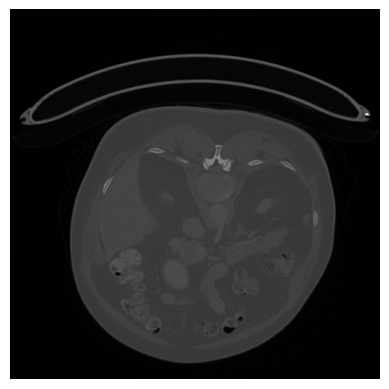

In [199]:
png_conv(dcmpath1_image,train_image)

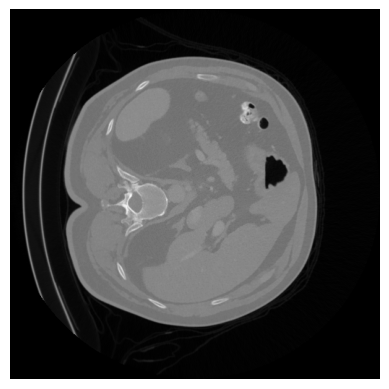

In [200]:
png_conv(dcmpath2_image,train_image)

In [9]:
# png_conv(dcmpath1_mask,train_mask)